In [69]:
from __future__ import (division, print_function, unicode_literals,
                        absolute_import)  # for Python 2.7

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import random
# import some data to play with
iris = datasets.load_iris()

In [70]:
#Model Basic (Using some basic stuff from TF)
x = tf.placeholder(tf.float32, [None, 4])
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 3])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
nbepochs = 30
steps = len(X_train[:,1])
teststeps = len(X_test[:,1])
results = np.zeros(nbepochs)
for k in range(int(nbepochs)):
    for it in range(steps):
        yit = np.zeros([3])
        ind = y_train[it-1]
        yit[ind] = 1
        yit_rs = np.reshape(yit,(1, 3))
        xit = X_train[it-1,:]
        xit_rs = np.reshape(xit,(1,4))
        sess.run(train_step, feed_dict={x:xit_rs, y_:yit_rs})
        
    #Evaluate Model    
    xte_rs = np.reshape(X_test,(len(X_test[:,1]),4))
    yte_new = np.zeros([len(y_test[:]),3])
    for it in range(len(X_test[:,1])):
        yit = np.zeros([3])
        ind = y_test[it-1]
        yit[ind] =1
        yte_new[it-1,:] += yit
    
    
    yte_rs = np.reshape(yte_new,(len(y_test[:]),3))
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    val = sess.run(accuracy, feed_dict={x: xte_rs, y_: yte_rs})
    results[k] = val*100
    
        

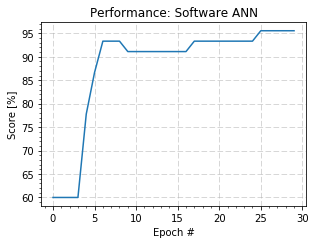

In [71]:
fig0, ax0 = plt.subplots(num="results", figsize=(4.5, 3.5))
fig, ax = fig0, ax0  # Copy-pasting is easier if one always use "ax." to call the methods ;).

ax.plot(range(len(results)), results)  # Actually "range(len(results))" is useless

# Cosmeticks
ax.set_title("Performance: Software ANN")
ax.set_xlabel("Epoch #")
ax.set_ylabel("Score [%]")
#ax.set_ylim(0, 1)
ax.minorticks_on()
ax.grid(ls='dashed', lw=0.5)
fig.tight_layout()

#plt.savefig('performance-offchip.png',format = 'png',dpi = 300)
plt.show()